In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
plt.style.use('dark_background')
plt.style.use('seaborn-dark')

In [18]:
files_directory = 'input/'
installments = pd.read_csv(files_directory + 'installments_payments.csv')

In [19]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [20]:
application_test = pd.read_csv(files_directory + 'application_test.csv')
application_train = pd.read_csv(files_directory + 'application_train.csv')

In [21]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [23]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [24]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [25]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [26]:
set(application_train.columns) - set(application_test.columns)

{'TARGET'}

In [27]:
application_train['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

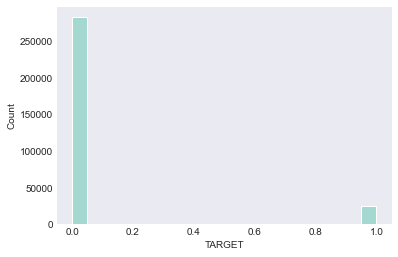

In [28]:
sns.histplot(data=application_train, x="TARGET")

In [29]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

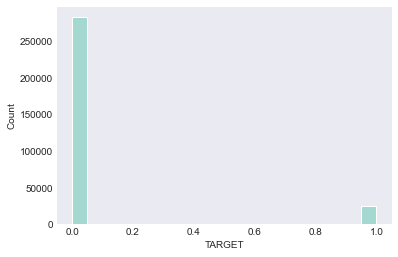

In [30]:
sns.histplot(data=application_train, x="TARGET")
plt.title('')
plt.show()

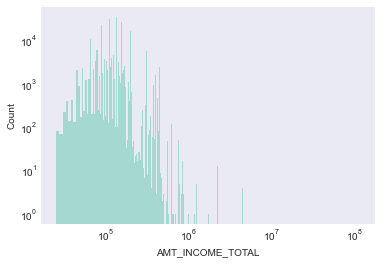

In [31]:
g = sns.histplot(data=application_train, x="AMT_INCOME_TOTAL")
g.set_yscale("log")
g.set_xscale("log")
plt.title('')
plt.show()

In [32]:
application_train['AMT_INCOME_TOTAL'].quantile(.1)

81000.0

In [33]:
application_train['AMT_INCOME_TOTAL'].quantile(.2)

99000.0

In [34]:
application_train['AMT_INCOME_TOTAL'].quantile([.1, .2, .3])


0.1     81000.0
0.2     99000.0
0.3    112500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [38]:
income_application_train['AMT_INCOME_TOTAL'].quantile(np.arange(0, 1.1, .1))

0.0        25650.0
0.1        81000.0
0.2        99000.0
0.3       112500.0
0.4       135000.0
0.5       147150.0
0.6       162000.0
0.7       180000.0
0.8       225000.0
0.9       270000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [41]:
application_train['AMT_INCOME_TOTAL'].apply(lambda x: 20000 <= x < 40000).sum()

963

In [70]:
lower_bound_income = np.arange(0, 300, 20)
upper_bound_income = [u + 20 for u in lower_bound_income]
upper_bound_income[-1] = np.inf

In [71]:
range_name = []
effectifs = []

for low, up in zip(lower_bound_income, upper_bound_income):
    range_name.append(str(low) + 'k' + '-' + str(up) + 'k')
    effectifs.append(application_train['AMT_INCOME_TOTAL'].apply(lambda x: 1000*low <= x < 1000*up).sum())

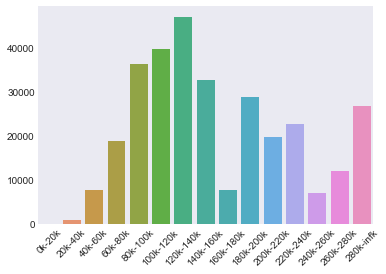

In [72]:
sns.barplot(x=range_name, y=effectifs)
plt.xticks(rotation=45)
plt.show()

In [80]:
set(application_train['NAME_CONTRACT_TYPE'])

{'Cash loans', 'Revolving loans'}

In [81]:
set(application_train['CODE_GENDER'])

{'F', 'M', 'XNA'}

In [114]:
width_income_group = 20000
width_income_group_k = int(width_income_group // 1000)
max_income_group = 20
application_train['income_group'] = application_train['AMT_INCOME_TOTAL'].astype(int) // width_income_group
application_train['income_group'] = application_train['income_group'].apply(lambda x: min(x, max_income_group))

In [164]:
fails = pd.DataFrame(application_train[application_train['TARGET'] == 1]['income_group'].value_counts().sort_index().rename('nb_loans'))
fails['status'] = 'fail'
success = pd.DataFrame(application_train[application_train['TARGET'] == 0]['income_group'].value_counts().sort_index().rename('nb_loans'))
success['status'] = 'success'
to_plot = pd.concat([fails, success])

In [167]:
labels = [str(width_income_group_k * x) + 'k-' + str(width_income_group_k * (x+1)) + 'k' for x in to_plot.index]
max_income = labels[-1]
labels = [((labels[-1].split('-')[0] + '+') if l == max_income else l)for l in labels]
to_plot.index = labels
to_plot = to_plot.reset_index().rename(columns={'index': 'income_group'})

In [168]:
to_plot

,income_group,nb_loans,status
0,20k-40k,80,fail
1,40k-60k,558,fail
2,60k-80k,1531,fail
3,80k-100k,3056,fail
4,100k-120k,3461,fail
5,120k-140k,3991,fail
6,140k-160k,2860,fail
7,160k-180k,635,fail
8,180k-200k,2379,fail
9,200k-220k,1601,fail


In [203]:

fig = go.Figure()
for status, group in to_plot.groupby("status"):
    fig.add_trace(go.Bar(x=group["income_group"], y=group["nb_loans"], name=status,
      hovertemplate="status=%s<br>income_group=%%{x}<br>nb_loans=%%{y}<extra></extra>"% status))
fig.update_layout(legend_title_text = "Status")
fig.update_xaxes(title_text="income_group")
fig.update_yaxes(title_text="nb_loans")
fig.update_layout(barmode='stack')
fig.show()

In [192]:
max_children = 3
application_train['children_group'] = application_train['CNT_CHILDREN']\
    .apply(lambda x: str(x) if x < max_children else str(max_children) + '+')

In [193]:
application_train['children_group'].value_counts().sort_index()

0     215371
1      61119
2      26749
3+      4272
Name: children_group, dtype: int64

In [200]:
children_filter = '3+'
def get_data_filtered_by_child_group(group=None):
    if not group:
        return application_train
    return application_train[application_train['children_group'] == group]


In [201]:
df = get_data_filtered_by_child_group(children_filter)

In [206]:
to_plot

,income_group,nb_loans,status
0,20k-40k,80,fail
1,40k-60k,558,fail
2,60k-80k,1531,fail
3,80k-100k,3056,fail
4,100k-120k,3461,fail
5,120k-140k,3991,fail
6,140k-160k,2860,fail
7,160k-180k,635,fail
8,180k-200k,2379,fail
9,200k-220k,1601,fail
